# Ensemble

### What is ensemble learning ?

Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models

It aims to mitigate errors or biases that may exist in individual models by leveraging the collective intelligence of the ensemble.

# Ensemble Techniques :

## Basic Ensembling Techniques
Max Voting

Averaging

Weighted Averaging

Max Voting : The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

Averaging: Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. 

Weighted Avg : This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

## Advanced Ensemble techniques

Stacking
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. 

Blending
Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only.

Bagging : Bagging (or Bootstrap Aggregating) technique uses  subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

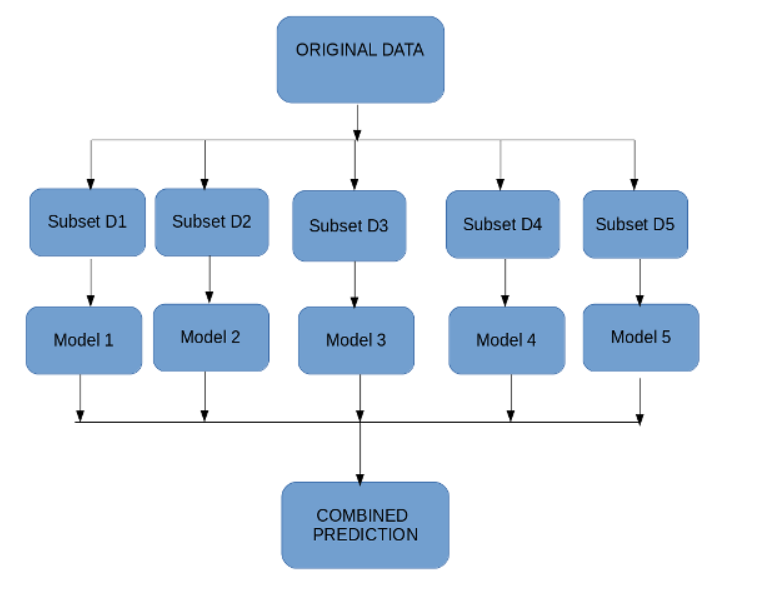


Boosting
Before we go further, here’s another question for you: If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.

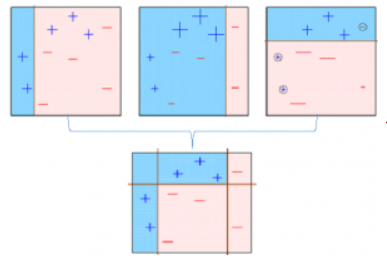

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [550]:
x,y=make_moons(n_samples = 1000, noise = 0.2)

In [551]:
df = {'x1' : x[:,0], 'x2':x[:,1], 'y' : y}

In [552]:
df = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

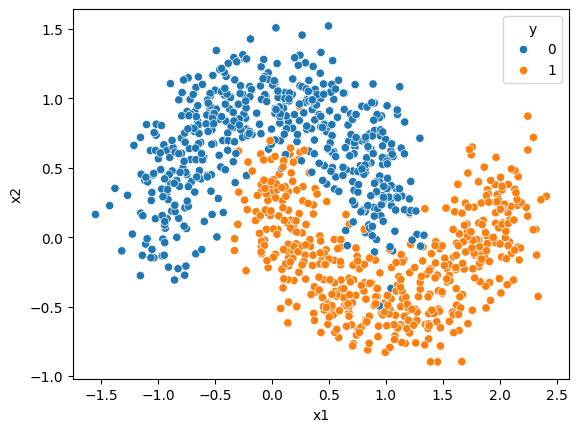

In [553]:
sns.scatterplot(x = 'x1', y = 'x2', data = df, hue= 'y')

In [554]:
x_a = df.iloc[:,:-1]
y_a = df['y']

In [555]:
x_a

,x1,x2
0,0.960199,-0.549018
1,0.481011,0.382534
2,-0.237747,1.283325
3,1.128243,-0.630694
4,1.861888,0.504134
...,...,...
995,0.264863,1.454844
996,0.354979,0.989085
997,-0.559785,0.760742
998,1.036307,-0.069592


In [556]:
from sklearn.model_selection import train_test_split

In [557]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a, test_size=0.2, random_state=42)

In [558]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [559]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 96.5)

In [560]:
y_test_pred = dt.predict(x_test)

In [561]:
from sklearn.metrics import accuracy_score

In [562]:
accuracy_score(y_test, y_test_pred)

0.965

In [563]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(96.625, 96.5)

In [564]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(86.875, 96.5)

In [565]:
## Using Voting Classifier

In [566]:
from sklearn.ensemble import VotingClassifier

In [567]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [568]:
vc = VotingClassifier(li, weights=[10,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [569]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.625, 96.0)

In [570]:
prd = {'dt': dt.predict(x_test), 'svm' : sv.predict(x_test), 'gnb' : gnb.predict(x_test), 'vc' : vc.predict(x_test)}

In [571]:
vc_df = pd.DataFrame(prd)
vc_df.head(10)

,dt,svm,gnb,vc
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,0
6,1,1,1,1
7,0,0,0,0
8,1,1,1,1
9,0,0,0,0


vc is giving the mode() of the 3 predictions that is whichever prediction 0/1 comes more that will be the o/p

### Average and Weighted AVG

In [573]:
dataset = pd.read_csv('placement.csv')

In [574]:
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [575]:
x = dataset.iloc[:,:-1]
y = dataset['package']

In [576]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [577]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [578]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train),lr.score(x_test, y_test)

(0.7758339025733345, 0.7730984312051673)

In [579]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_train,y_train),dtr.score(x_test, y_test)

(0.9515592009554319, 0.5219733481708333)

In [580]:
sv = SVR()
sv.fit(x_train, y_train)
sv.score(x_train,y_train),sv.score(x_test, y_test)

(0.7816909319813372, 0.7594945442913416)

In [641]:
from sklearn.ensemble import VotingRegressor

In [643]:
li2 = [('lr1', LinearRegression()),('dt1' ,DecisionTreeRegressor()), ('sv1', SVR())]

In [645]:
vr = VotingRegressor(estimators=li2)
vr

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('sv1', SVR())])

In [647]:
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('sv1', SVR())])

In [649]:
vr.score(x_train, y_train), vc2.score(x_test, y_test)

(0.8756852979319457, 0.7516568331690885)

In [651]:
vr_df = {'lr' : lr.predict(x_test), 'dt' : dtr.predict(x_test), 'svm' : sv.predict(x_test), 'vr' : vr.predict(x_test) }

In [653]:
pd.DataFrame(vr_df).head(3)

,lr,dt,svm,vr
0,2.780313,2.9200,2.745462,2.815259
1,3.136352,3.2525,3.111375,3.166742
2,3.199521,2.9200,3.186923,3.102148


In [636]:
(2.780313 + 2.9200 + 2.745462)/3

2.815258333333333

So, VC2 is fetching the average of the 3 predictions